In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import scanpy.plotting as scp
import seaborn as sns
from collections import defaultdict
%matplotlib inline

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

TREATED_LABEL = "TGFB1"

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.16.4 scipy==1.3.1 pandas==0.25.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
filename = "tgfb1-5-" + TREATED_LABEL + ".h5ad"
filename = os.path.join("write", filename)
adata = anndata.read(filename)

In [3]:
adata

AnnData object with n_obs × n_vars = 1893 × 4708 
    obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'alk5 signature', 'alk1 signature', 'fibro signature', 'smc signature', 'osteo signature', 'ca2+ signature', 'apoptosis signature'
    var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'spliced', 'unspliced', 'variance_velocity', 'velocity'

In [4]:
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=True, vector_friendly=True, fontsize=14, color_map=None, format='pdf', transparent=False, ipython_format='png2x')

In [5]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:28)


In [6]:
sc.tl.paga(adata, groups='louvain')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


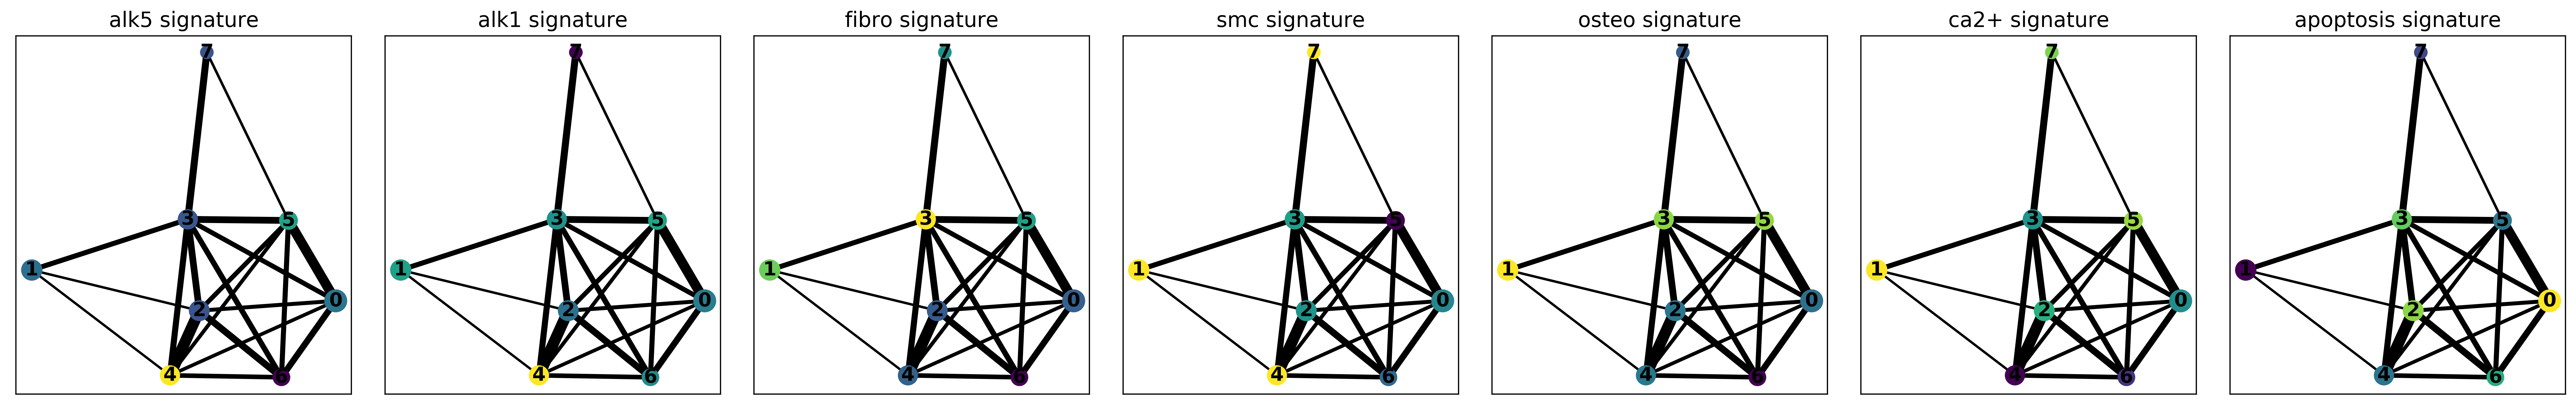

In [7]:
sc.pl.paga(adata, color=['alk5 signature', 'alk1 signature', 'fibro signature', 'smc signature', 'osteo signature', 'ca2+ signature', 'apoptosis signature'], threshold=0.2)